In [1]:
import os
os.chdir('../')

import os
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR, MultiStepLR, ExponentialLR

from src.models.model import VideoModel

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

In [59]:
from torchvision.models import inception_v3
model = inception_v3(aux_logits=False)
x = torch.randn(2, 3, 300, 400)
out = model(x)
out.size()

torch.Size([2, 1000])

In [61]:
from src.archs.inceptionv3 import inceptionv3
model = inceptionv3()
x = torch.randn(2, 3, 300, 400)
out = model(x)
out.size()

=> Loading from pretrained model: imagenet


torch.Size([2, 1000])

In [3]:
model = VideoModel(
    num_classes=2, 
    num_segments=8, 
    base_model="InceptionV3",
    fusion_mode='GSF',
    verbose=False,
)

=> Using GSF fusion
No. of GSF modules = 11


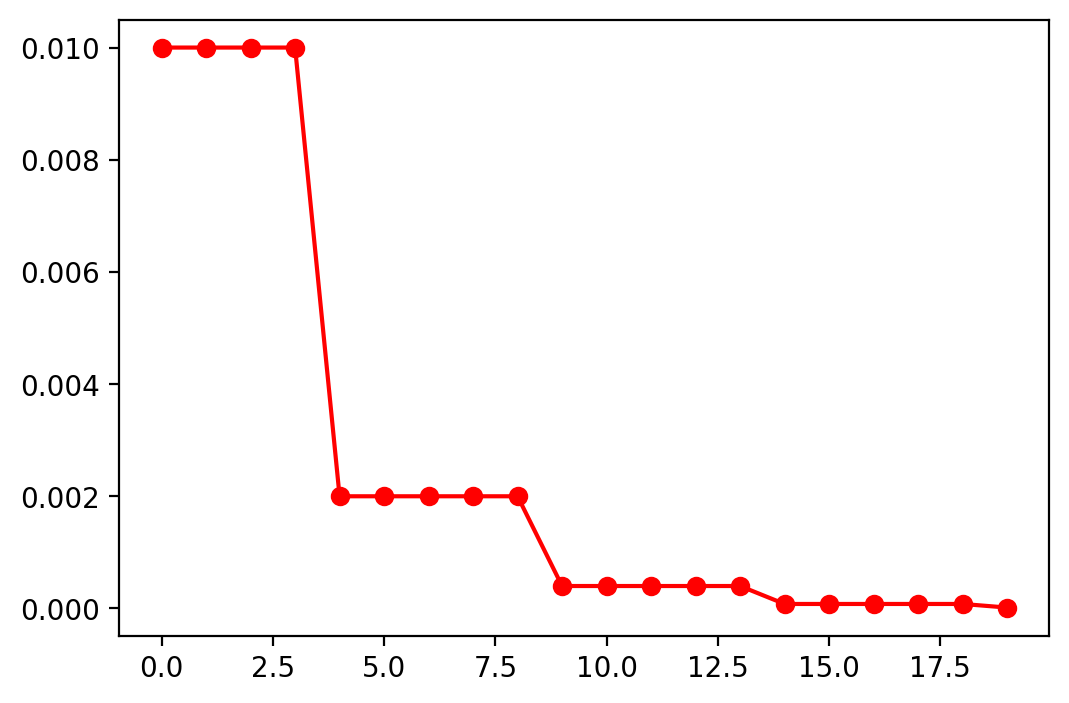

In [4]:
num_epochs = 20

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=0.005
)

lr_scheduler = StepLR(
    optimizer=optimizer,
    step_size=5,
    gamma=0.2
)

lr_list = []
for epoch in range(num_epochs):
    optimizer.step()
    lr_scheduler.step()
    lr_list.append(optimizer.param_groups[0]['lr'])

plt.figure(figsize=(6,4))
plt.plot(range(num_epochs), lr_list, 'ro-');

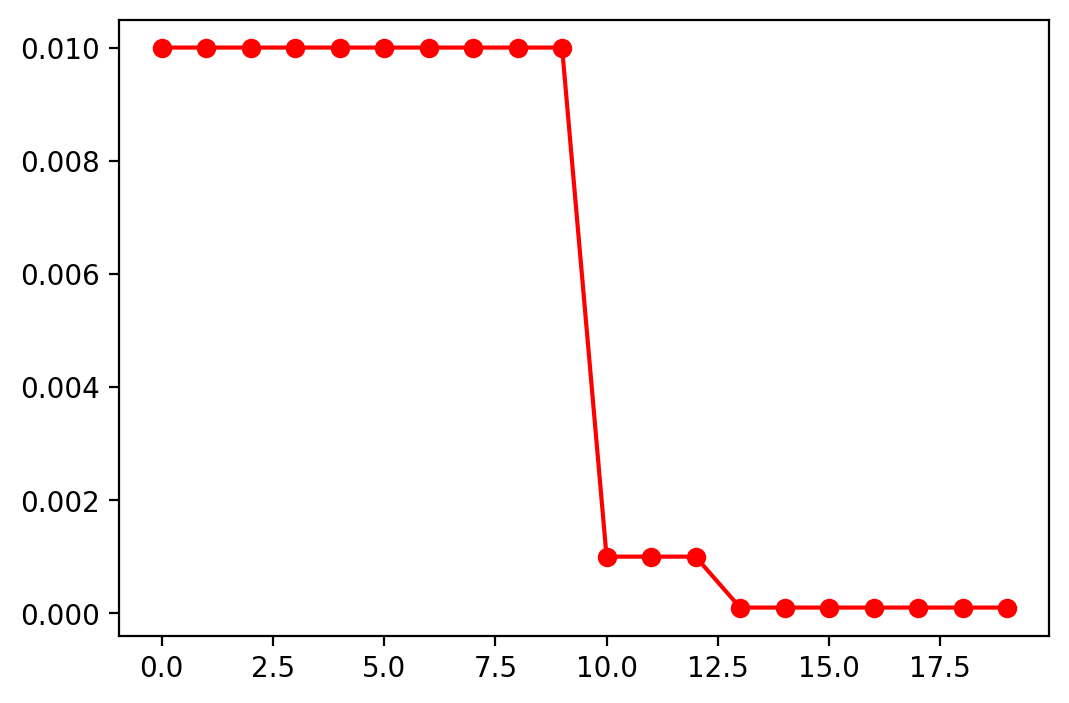

In [5]:
num_epochs = 20

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=0.005
)

lr_scheduler = MultiStepLR(
    optimizer=optimizer,
    milestones=[11, 14],
    gamma=0.1
)

lr_list = []
for epoch in range(num_epochs):
    optimizer.step()
    lr_scheduler.step()
    lr_list.append(optimizer.param_groups[0]['lr'])

plt.figure(figsize=(6,4))
plt.plot(range(num_epochs), lr_list, 'ro-');

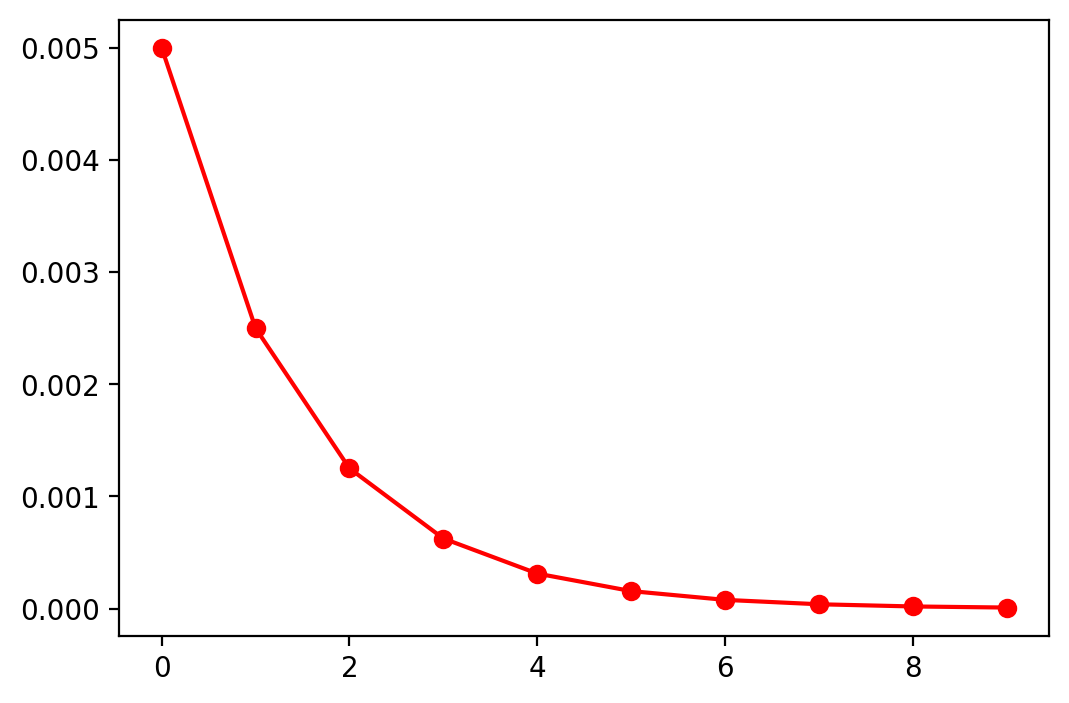

In [6]:
num_epochs = 10

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=0.005
)

lr_scheduler = ExponentialLR(
    optimizer=optimizer,
    gamma=0.5
)

lr_list = []
for epoch in range(num_epochs):
    optimizer.step()
    lr_scheduler.step()
    lr_list.append(optimizer.param_groups[0]['lr'])

plt.figure(figsize=(6,4))
plt.plot(range(num_epochs), lr_list, 'ro-');

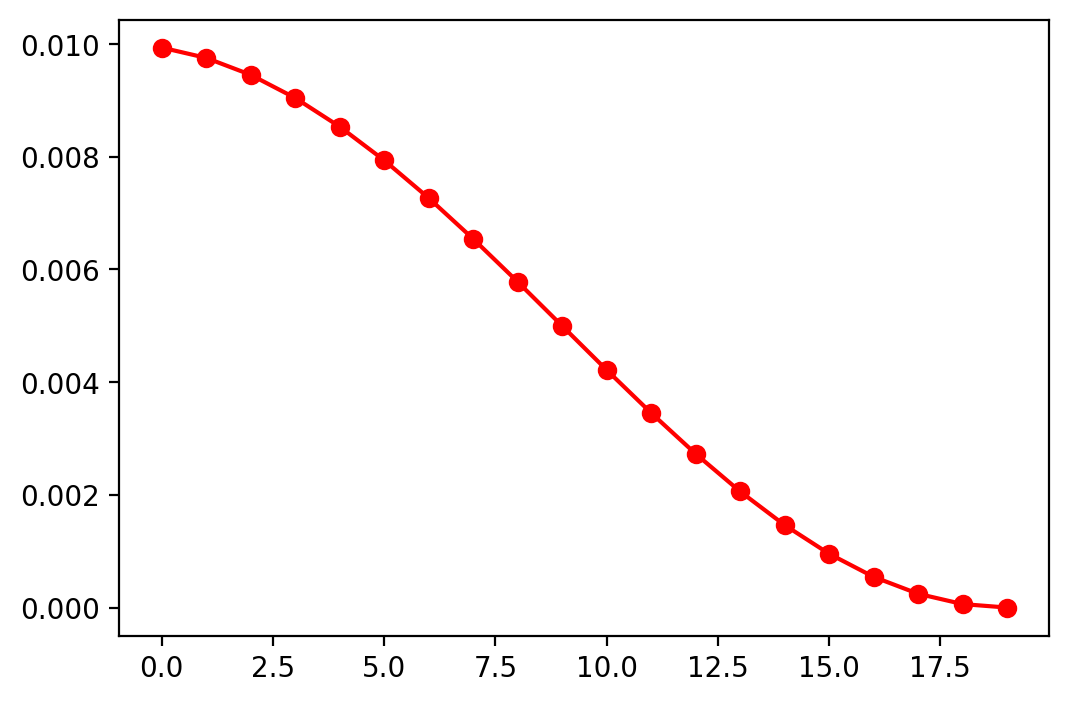

In [7]:
num_epochs = 20

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01,
    momentum=0.9,
    weight_decay=0.005
)

lr_scheduler = CosineAnnealingLR( 
    optimizer=optimizer, 
    T_max=num_epochs, 
    eta_min=1e-7, 
    last_epoch=-1
)

lr_list = []
for epoch in range(num_epochs):
    optimizer.step()
    lr_scheduler.step()
    lr_list.append(optimizer.param_groups[0]['lr'])

plt.figure(figsize=(6,4))
plt.plot(range(num_epochs), lr_list, 'ro-');